In [260]:
import numpy as np
import os
import pandas as pd
%matplotlib notebook

In [153]:
os.chdir('c:\\users\\christopher\\desktop\\physician_compare')
files = os.listdir()
with open(files[4], 'r') as f:
    print(f.readlines()[:2])

['NPI,PAC ID,Professional Enrollment ID,Last Name,First Name,Middle Name,Suffix,Gender,Credential,Medical school name,Graduation year,Primary specialty,Secondary specialty 1,Secondary specialty 2,Secondary specialty 3,Secondary specialty 4,All secondary specialties,Organization legal name,Group Practice PAC ID,Number of Group Practice members,Line 1 Street Address,Line 2 Street Address,Marker of address line 2 suppression,City,State,Zip Code,Phone Number,Hospital affiliation CCN 1,Hospital affiliation LBN 1,Hospital affiliation CCN 2,Hospital affiliation LBN 2,Hospital affiliation CCN 3,Hospital affiliation LBN 3,Hospital affiliation CCN 4,Hospital affiliation LBN 4,Hospital affiliation CCN 5,Hospital affiliation LBN 5,Professional accepts Medicare Assignment,Reported Quality Measures,Used electronic health records,Committed to heart health through the Million HeartsÂ® initiative.\n', '1487927612,4880850486,I20120726000331,HALL,ESTHER,S,,F,,LIFE CHIROPRACTIC COLLEGE - WEST,2010,CHIROPR

In [210]:
cols = ['NPI', 
        'PAC ID', 
        'Professional Enrollment ID', 
        'Gender', 
        'Credential']
df_nat = pd.read_csv(files[4], usecols = cols)

In [137]:
df_nat.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955262 entries, 0 to 2955261
Data columns (total 7 columns):
NPI                           int64
PAC ID                        int64
Professional Enrollment ID    object
Gender                        object
Credential                    object
Graduation year               float64
State                         object
dtypes: float64(1), int64(2), object(4)
memory usage: 727.9 MB


In [10]:
df_nat.Gender.unique()

array(['F', 'M', 'U'], dtype=object)

In [209]:
for obj in df_nat.select_dtypes(include=['object']):
    if len(df_nat[obj].unique())/len(df_nat[obj]) < 0.25:
        df_nat[obj] = df_nat[obj].astype('category')
df_nat.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955262 entries, 0 to 2955261
Data columns (total 7 columns):
NPI                           int64
PAC ID                        int64
Professional Enrollment ID    object
Gender                        category
Credential                    category
Graduation year               float64
State                         category
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 279.0 MB


In [139]:
#Ratio of male:female physicians
(df_nat['Gender'] == 'M').sum()/(df_nat['Gender'] == 'F').sum()

1.3073393456791762

In [140]:
print("The number of rows with both unique identifiers repeated is {}".format(df_nat.duplicated(subset=['NPI', 'PAC ID']).sum()))

The number of rows with both unique identifiers repeated is 1884863


In [147]:
df_nat_uniq = df_nat.drop_duplicates(subset=['NPI', 'PAC ID']).copy()

In [143]:
print("The number of physicians with NPI and PAC ID that are both unique is {}".format(len(df_nat)))

The number of physicians with NPI and PAC ID that are both unique is 1070399


In [148]:
df_nat_uniq.Credential.nunique()

21

In [149]:
df_nat_uniq.groupby(["Credential"])['Gender'].apply(lambda x: (x == 'F').sum()/(x == 'M').sum())

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in longlong_scalars
  if __name__ == '__main__':


Credential
AA       0.897436
AU       3.493976
CNA      1.195792
CNM    130.857143
CNS     16.508772
CP       1.175744
CSW      3.527160
DC       0.281076
DDM      0.151515
DDS      0.083333
DO       0.371027
DPM      0.264071
MD       0.372612
MNT     34.842105
NP      10.147005
OD       0.592168
OT       4.415842
PA       1.439594
PSY      0.959459
PT       0.932422
SCW           inf
Name: Gender, dtype: float64

In [190]:
#overwrite with new set of columns for memory conservation
df_nat = pd.read_csv(files[4], usecols = ['State',
                                          'Hospital affiliation CCN 1',
                                         'Hospital affiliation CCN 2',
                                         'Hospital affiliation CCN 3',
                                         'Hospital affiliation CCN 4',
                                         'Hospital affiliation CCN 5'])
# for obj in df_nat.select_dtypes(include=['object']):
#     if len(df_nat[obj].unique())/len(df_nat[obj]) < 0.25:
#         df_nat[obj] = df_nat[obj].astype('category')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (33,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [191]:
df_nat.rename({'Hospital affiliation CCN 1':'HA1',
               'Hospital affiliation CCN 2':'HA2',
               'Hospital affiliation CCN 3':'HA3',
               'Hospital affiliation CCN 4':'HA4',
               'Hospital affiliation CCN 5':'HA5'}, axis=1, inplace=True)
df_nat.columns

Index(['State', 'HA1', 'HA2', 'HA3', 'HA4', 'HA5'], dtype='object')

In [204]:
df_nat.isnull().sum()

State          0
HA1       769066
HA2      1607953
HA3      2114563
HA4      2414805
HA5      2596279
dtype: int64

In [206]:
df_nat.groupby("State").apply(lambda g: len(g) - g.duplicated().sum())

State
AK      761
AL     4494
AR     3309
AZ     5972
CA    20045
CO     5978
CT     3282
DC     1192
DE      970
FL    15860
GA     9215
GU       59
HI      877
IA     5382
ID     2154
IL    16434
IN    11727
KS     4790
KY     6679
LA     5585
MA     8412
MD     5875
ME     2666
MI    13522
MN     8476
MO     9779
MP        9
MS     4079
MT     1851
NC     9877
ND     1686
NE     3775
NH     2376
NJ     9493
NM     2044
NV     2569
NY    15970
OH    18285
OK     5477
OR     4601
PA    21023
PR      748
RI     1527
SC     5641
SD     2202
TN     8333
TX    24112
UT     2780
VA     9432
VI       23
VT      956
WA     7503
WI     9495
WV     2869
WY     1016
dtype: int64

In [215]:
#creating the performance df
df_per = pd.read_csv(files[2])

In [216]:
cols = [ col.replace(" ", "_") for col in df_per.columns ]
df_per.columns = cols

In [217]:
df_per.head(2)

,NPI,PAC_ID,Last_Name,First_Name,Measure_Identifier,Measure_Title,Inverse_Measure,Measure_Performance_Rate,Reporting_Mechanism,Reported_on_PC_Live_Site
0,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_110_1,Preventive Care and Screening: Influenza Immun...,N,21,CLM,Y
1,1508823618,42100117,GRIFFIN,DAVID,PQRS_EP_111_1,Pneumonia Vaccination Status for Older Adults,N,28,CLM,Y


In [218]:
idcs = df_per.query('Inverse_Measure == "Y"').index
df_per.Measure_Performance_Rate.loc[idcs]= df_per.query('Inverse_Measure == "Y"')["Measure_Performance_Rate"].transform(lambda x: 100 - x)

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [104]:
len(df_per.NPI.unique()) == len(df_per.PAC_ID.unique())

True

In [271]:
num_of_measures = df_per.groupby(['NPI', 'PAC_ID'])["Measure_Performance_Rate"].count()
mean_measures = df_per.groupby(['NPI', 'PAC_ID'])["Measure_Performance_Rate"].mean()
mean_and_count = pd.DataFrame(num_of_measures).join(mean_measures, rsuffix='_')
mean_and_count.columns = ["measures", "means"]

In [272]:
mean_and_count.query('measures >= 10')['means'].std()

16.005684152369238

In [273]:
mean_and_count.head()

,,measures,means
NPI,PAC_ID,,
1003000142,9931380672,8,46.125
1003000407,2769663509,1,76.000
1003000704,2365611035,1,100.000
1003000829,4587977046,2,98.000
1003001371,4385734086,2,91.000


In [274]:
#p-value graduation year and performance metrics
cols = ['NPI', 
        'PAC ID', 
        'Graduation year']
df_nat = pd.read_csv(files[4], usecols = cols)
df_nat.columns = [col.replace(" ", "_") for col in cols]

In [275]:
df_nat.set_index(['NPI', 'PAC_ID'], inplace=True);

In [276]:
#join df_nat with df_per on NPI and PAC ID
df_comb = mean_and_count.join(df_nat)
df_comb.drop_duplicates(inplace=True)

In [277]:
df_comb.head()

,,measures,means,Graduation_year
NPI,PAC_ID,,,
1003000142,9931380672,8,46.125,1999.0
1003000407,2769663509,1,76.000,2003.0
1003000704,2365611035,1,100.000,2007.0
1003000829,4587977046,2,98.000,2007.0
1003001371,4385734086,2,91.000,1998.0


In [278]:
grad_perf = df_comb.query('(measures >= 10) & (1973.0 <= Graduation_year <= 2003.0)').copy()

In [279]:
year_means = grad_perf.groupby("Graduation_year")['means'].apply(lambda x: x.mean())

In [280]:
year_means

Graduation_year
1973.0    66.875122
1974.0    65.519294
1975.0    67.600150
1976.0    69.077506
1977.0    59.334021
1978.0    64.362933
1979.0    65.619823
1980.0    64.470420
1981.0    65.390713
1982.0    65.899130
1983.0    66.497419
1984.0    66.679023
1985.0    62.469208
1986.0    67.677605
1987.0    66.861683
1988.0    66.869248
1989.0    66.388306
1990.0    66.961101
1991.0    67.663159
1992.0    64.134766
1993.0    65.762635
1994.0    65.223057
1995.0    68.247381
1996.0    64.929501
1997.0    63.889713
1998.0    64.865963
1999.0    60.131220
2000.0    63.876817
2001.0    64.406035
2002.0    59.228166
2003.0    59.645759
Name: means, dtype: float64

<IPython.core.display.Javascript object>


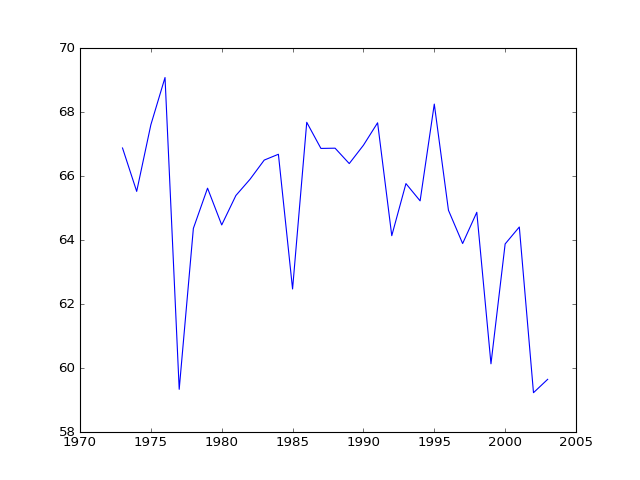

In [281]:
import matplotlib.pyplot as plt
years = year_means.index.astype(int)
plt.plot(years, year_means)

In [285]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(years,year_means)
print("The slope is {0}, the r_value {1}, and the p_value for this model is {2}".format(slope, r_value, p_value))

The slope is -0.11402503488354694, the r_value -0.4013497191654799, and the p_value for this model is 0.025232684316232865
